In [ ]:
#just a test
print('Hello world')

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Define basic linear relationship

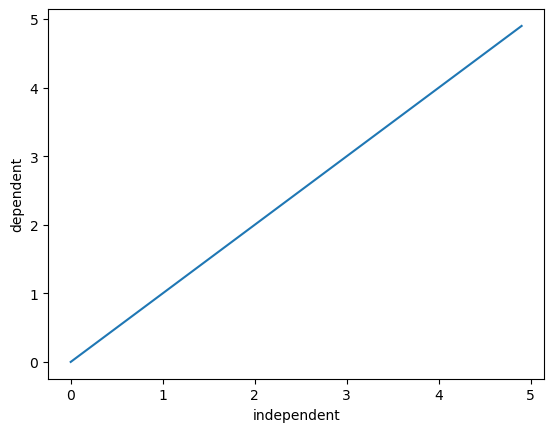

In [2]:
X = np.arange(0.0,5.0,0.1)
a = 1
b = 0

Y = a * X + b
plt.plot(X, Y)
plt.ylabel("dependent")
plt.xlabel('independent')
plt.show()

In [7]:
!curl -o FuelConsumption.csv 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72629  100 72629    0     0   223k      0 --:--:-- --:--:-- --:--:--  229k


In [10]:
df = pd.read_csv('/Users/devam/PycharmProjects/TensorFlow/data/FuelConsumption.csv')

In [11]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


define sole feature, sole output

In [13]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

In [14]:
a = tf.Variable(20.0)
b = tf.Variable(30.0)

def h(x):
    y = a*x + b
    return y

2023-07-24 13:37:20.526140: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-07-24 13:37:20.526310: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-07-24 13:37:20.526327: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-07-24 13:37:20.526818: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-24 13:37:20.527700: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Define loss function

In [15]:
def loss_function(y, train_y):
    return tf.reduce_mean(tf.square(y-train_y))

training the actual model

In [17]:
learning_rate = 0.01
train_data = []
loss_values = []
a_values = []
b_values = []

training_epochs = 200

for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        yhat = h(train_x)
        loss = loss_function(train_y, yhat)
        loss_values.append(loss)

        gradients = tape.gradient(loss, [b,a])
        a_values.append(a.numpy())
        b_values.append(b.numpy())
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

visualize loss over epochs

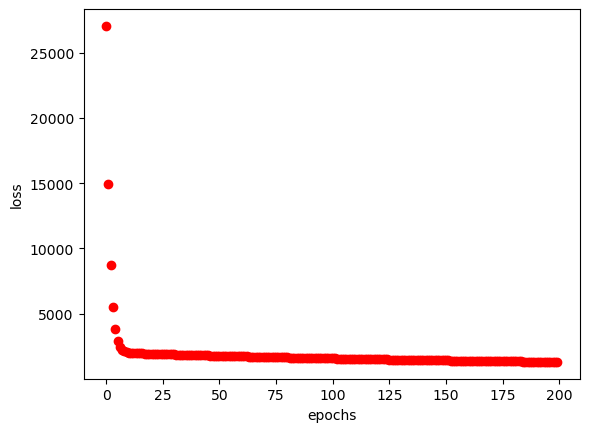

In [18]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(loss_values, 'ro')

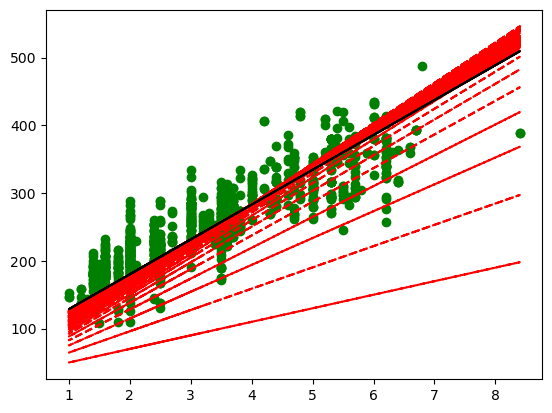

In [19]:
plt.scatter(train_x, train_y, color='green')
for a,b in zip(a_values[0:len(a_values)], b_values[0:len(b_values)]):
    plt.plot(train_x,a*train_x+b, color='red', linestyle='dashed')
plt.plot(train_x,a_values[-1]*train_x+b_values[-1], color='black')
plt.show()